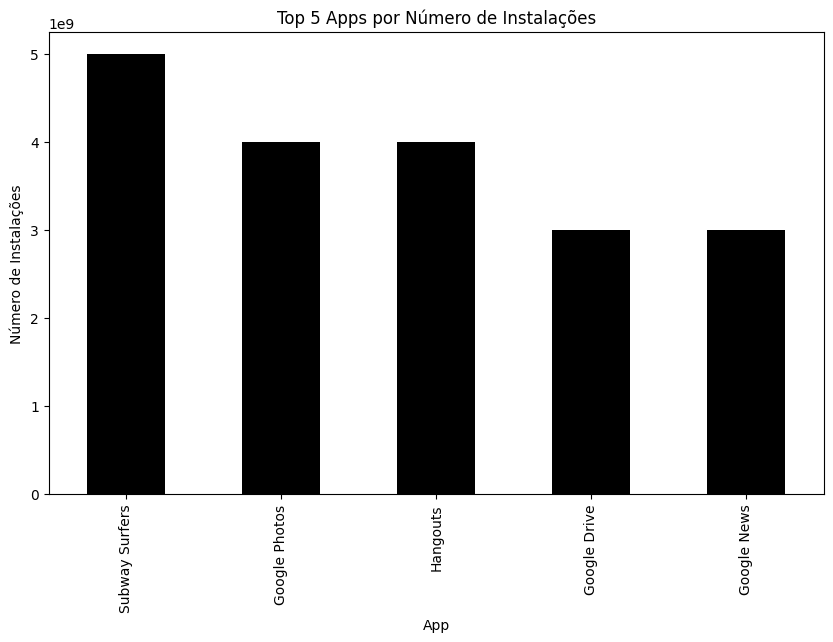

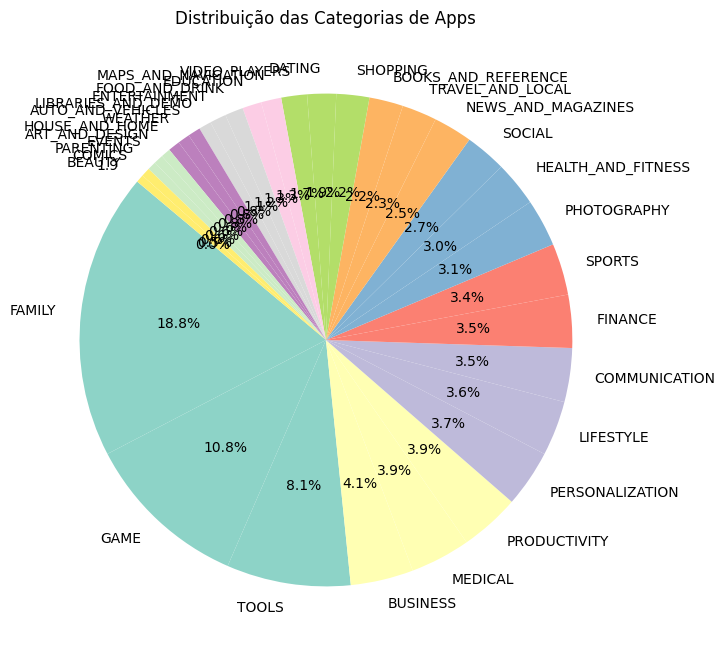

App mais caro: I'm Rich - Trump Edition | Preço: 400.0
----------------------------------------------------------------------------------
Número de apps classificados como 'Mature 17+': 447
----------------------------------------------------------------------------------
Top 10 apps por número de reviews:
                                                    App Reviews
2989                             GollerCepte Live Score    9992
4970                       Ad Block REMOVER - NEED ROOT     999
2705                                SnipSnap Coupon App    9975
3229                                         DreamTrips    9971
3049                  US Open Tennis Championships 2018    9971
7002   Adult Color by Number Book - Paint Mandala Pages     997
6724                     BSPlayer ARMv7 VFP CPU support    9966
7982  Easy Resume Builder, Resume help, Curriculum v...     996
353                                   MegaFon Dashboard   99559
326   Buff Thun - Daily Free Webtoon / Comics / Web 

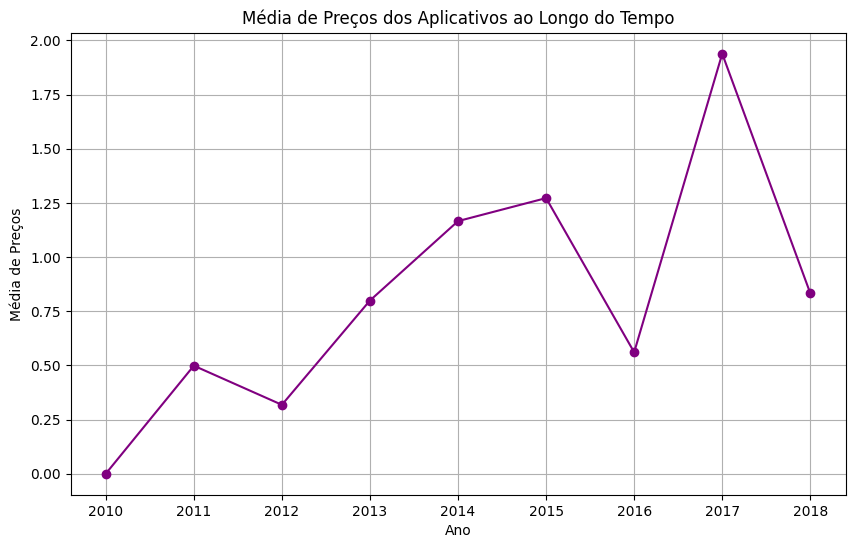

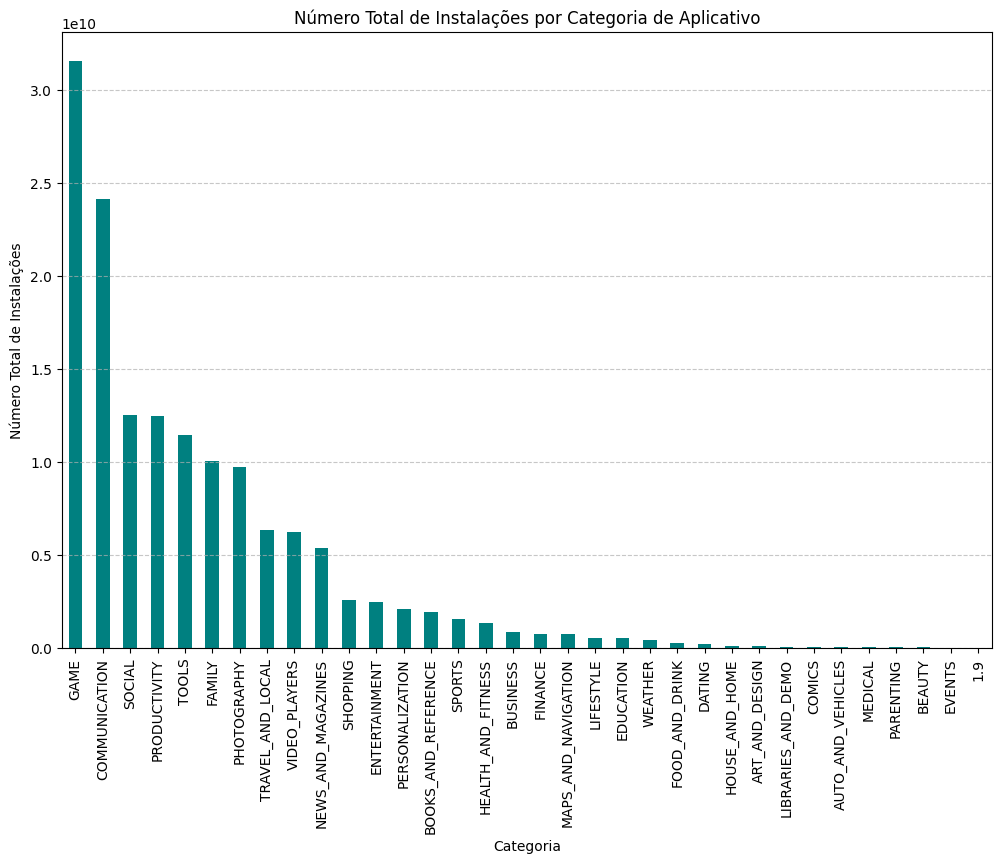

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Limpar e converter a coluna 'Installs' para numérico
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).replace('Free', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').dropna().astype(int)

# Top 5 Apps por Número de Instalações
top_5_installs = df.groupby('App')['Installs'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_5_installs.plot(kind='bar', color='black')
plt.title('Top 5 Apps por Número de Instalações')
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.show()

# Contagem de categorias de apps
category_counts = df['Category'].value_counts()

# Gráfico de pizza mostrando todas as categorias
plt.figure(figsize=(10, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Distribuição das Categorias de Apps')
plt.ylabel('')
plt.show()

# App mais caro existente no dataset
df['Price'] = df['Price'].str.replace('$', '').replace('Everyone', '0')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').dropna().astype(float)
most_expensive_app = df.loc[df['Price'].idxmax()]
print("App mais caro:", most_expensive_app['App'], "| Preço:", most_expensive_app['Price'])
print("----------------------------------------------------------------------------------")

# Contagem de apps classificados como 'Mature 17+'
mature_17_plus_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print("Número de apps classificados como 'Mature 17+':", mature_17_plus_count)
print("----------------------------------------------------------------------------------")

# Top 10 apps por número de reviews
top_10_reviews = df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)
print("Top 10 apps por número de reviews:")
print(top_10_reviews)
print("----------------------------------------------------------------------------------")

# Converter a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Criar uma nova coluna com o ano das atualizações
df['Ano_Atualizacao'] = df['Last Updated'].dt.year

# Contar o número de atualizações por ano
atualizacoes_por_ano = df['Ano_Atualizacao'].value_counts().sort_index()

# Calcular a média de preços por ano de atualização
media_precos_por_ano = df.groupby('Ano_Atualizacao')['Price'].mean().sort_index()

# Criar o gráfico de linhas mostrando a média de preços por ano
plt.figure(figsize=(10, 6))
plt.plot(media_precos_por_ano.index, media_precos_por_ano.values, marker='o', color='purple')
plt.title('Média de Preços dos Aplicativos ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Média de Preços')
plt.grid(True)
plt.show()


# Calcular o número total de instalações por categoria
total_instalacoes_por_categoria = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Criar o gráfico de barras verticais
plt.figure(figsize=(12, 8))
total_instalacoes_por_categoria.plot(kind='bar', color='teal')
plt.title('Número Total de Instalações por Categoria de Aplicativo')
plt.xlabel('Categoria')
plt.ylabel('Número Total de Instalações')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


